# Visualisation of Reconstructed Images

This notebook allows visualisation of examples of reconstructed images from the trained model.

The sample images are selected randomly from the validation set.

In [1]:
import matplotlib.pyplot as plt
import os
import logging
import tensorflow as tf

os.chdir('..')

from src.utils.data.tfdatasets import load_tf_img_dataset

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

2023-05-03 19:18:27.275664: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 19:18:27.948350: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-03 19:18:27.948394: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-05-03 19:18:27.948400: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [10]:
DATASET = 'streets'
INPUT_SIZE = (224, 224)
CMAP = 'viridis'
COLOR_MODE = 'rgb'

In [5]:

dataset = load_tf_img_dataset(
    dir='val',
    dir_path=os.path.join('data', 'processed', DATASET),
    input_size=(224, 224),
    mode='autoencoder',
    scale=255,
    shuffle=True,
    batch_size=2,
    color_mode=COLOR_MODE
)

Found 71 files belonging to 1 classes.


In [6]:
model = tf.keras.models.load_model(
    os.path.join('models', DATASET, 'bin', 'trained_cae.hdf5')
    )

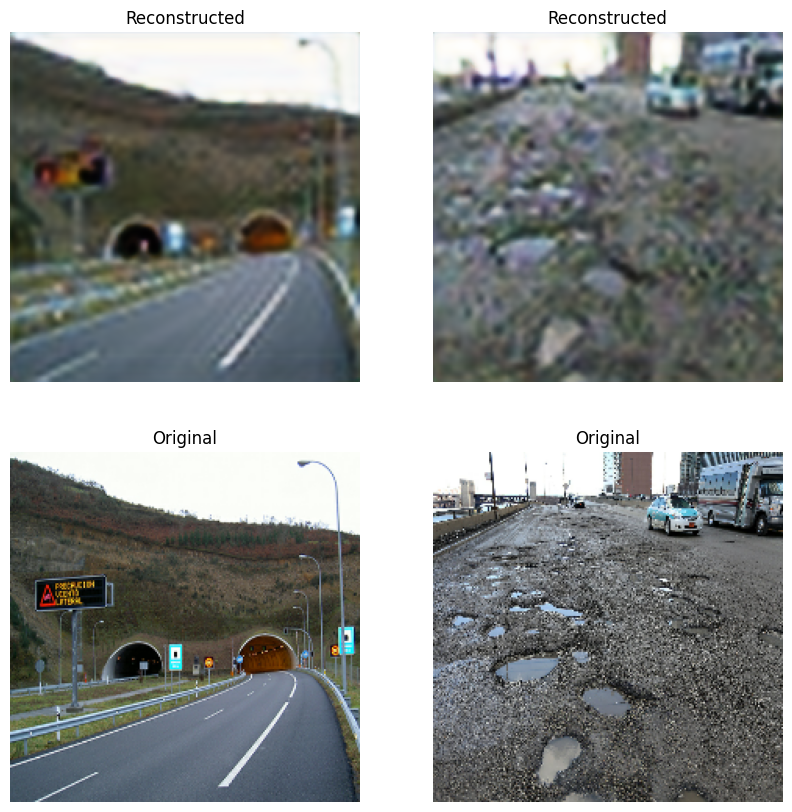

In [11]:
plt.figure(figsize=(10, 10))
for images, _ in dataset:
    for i in range(2):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(model(images)[i].numpy(), cmap=CMAP)
        plt.title('Reconstructed')
        plt.axis("off")
        ax = plt.subplot(2, 2, i + 3)
        plt.imshow(images[i].numpy(), cmap=CMAP)
        plt.title('Original')
        plt.axis("off")
    break

plt.show()